                                 Name    Year Duration            Genre  \
0                       Aan Aur Shaan -1984.0  130 min            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating  Votes            Director       Actor 1              Actor 2  \
0     6.4   37.0         Ravi Tandon  Rishi Kapoor  Moushumi Chatterjee   
1     7.0    8.0       Gaurav Bakshi  Rasika Dugal       Vivek Ghamande   
2     NaN    NaN  Soumyajit Majumdar  Sayani Gupta    Plabita Borthakur   
3     4.4   35.0          Ovais Khan       Prateik           Ishita Raj   
4     NaN    NaN        Amol Palekar  Rajat Kapoor   Rituparna Sengupta   

           Actor 3  
0    Shammi Kapoor  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Ka

C:\Users\HP\AppData\Local\Temp\ipykernel_13688\2000157833.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned['Year'] = movie_data_cleaned['Year'].astype(int)


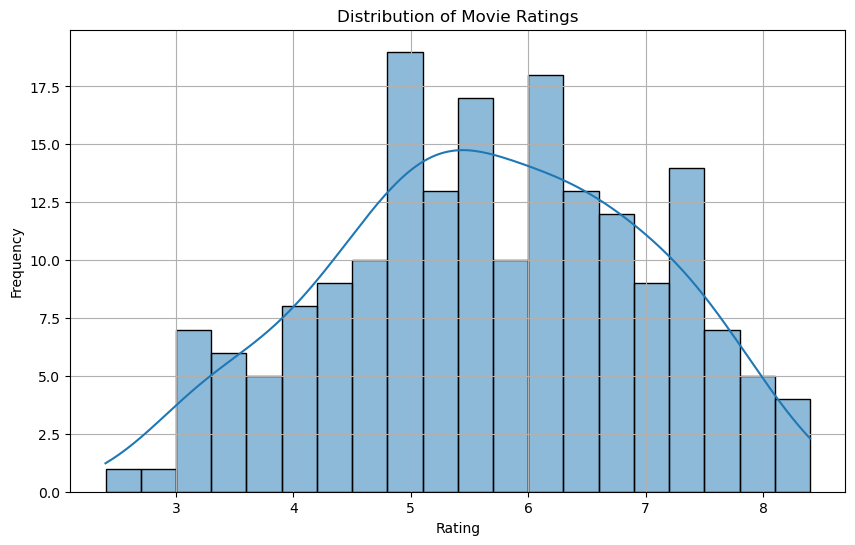

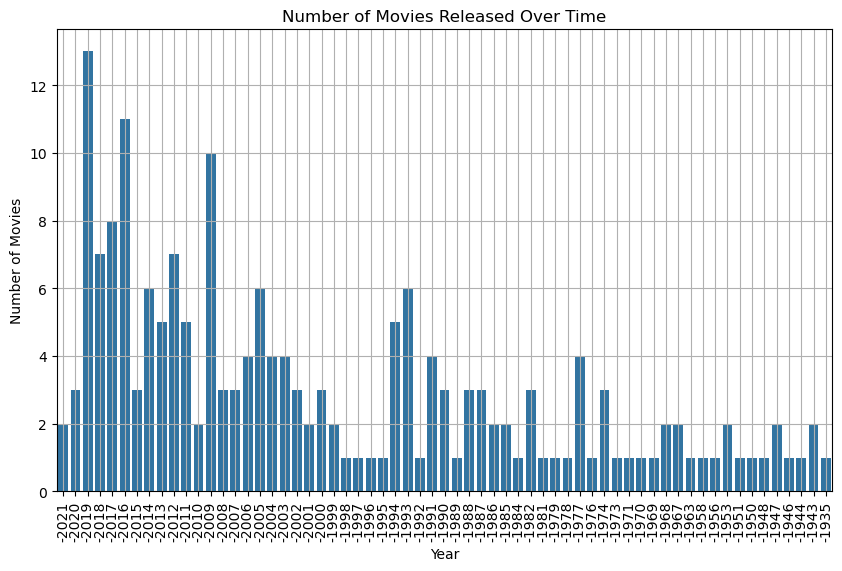

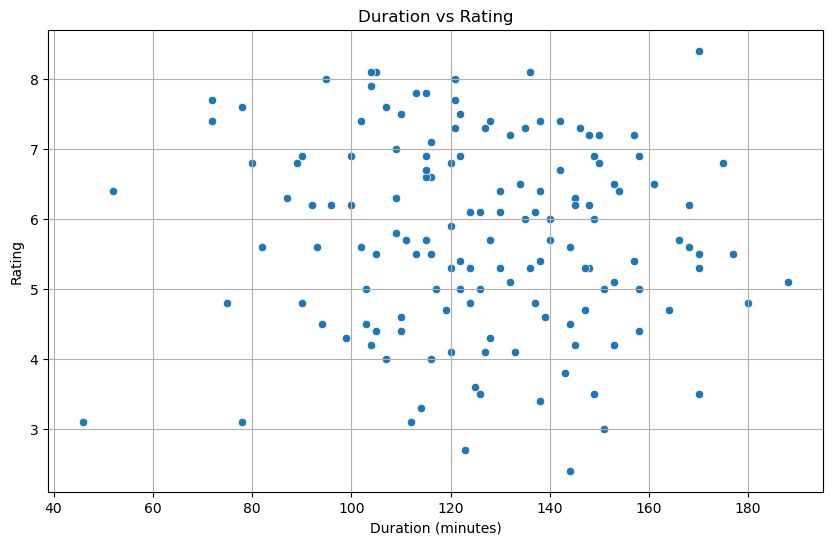

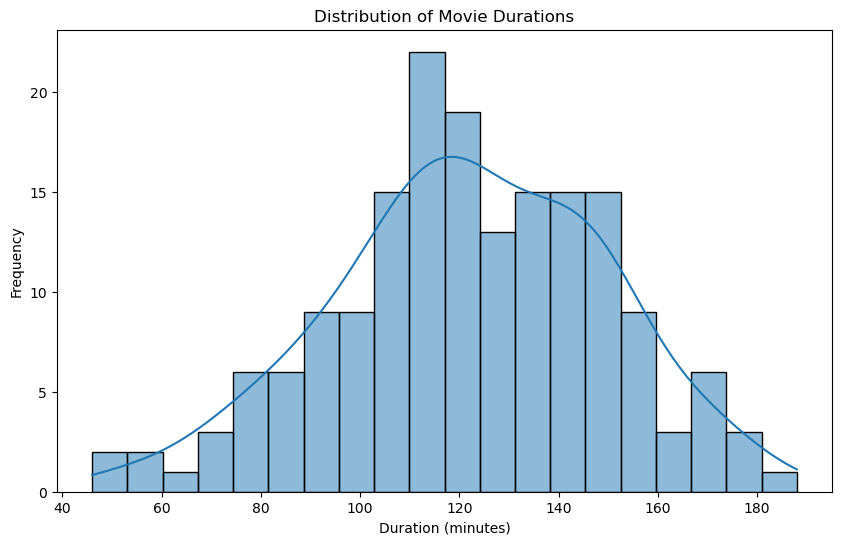

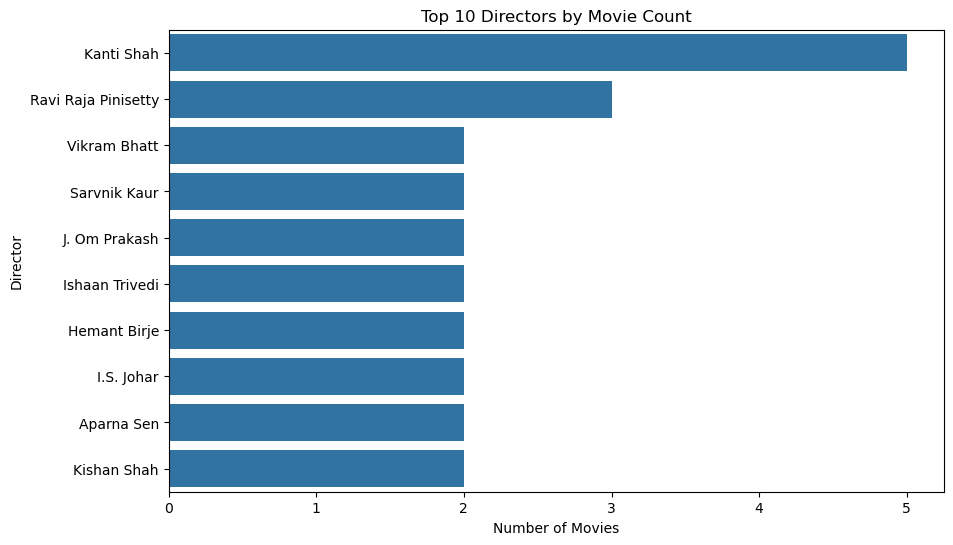

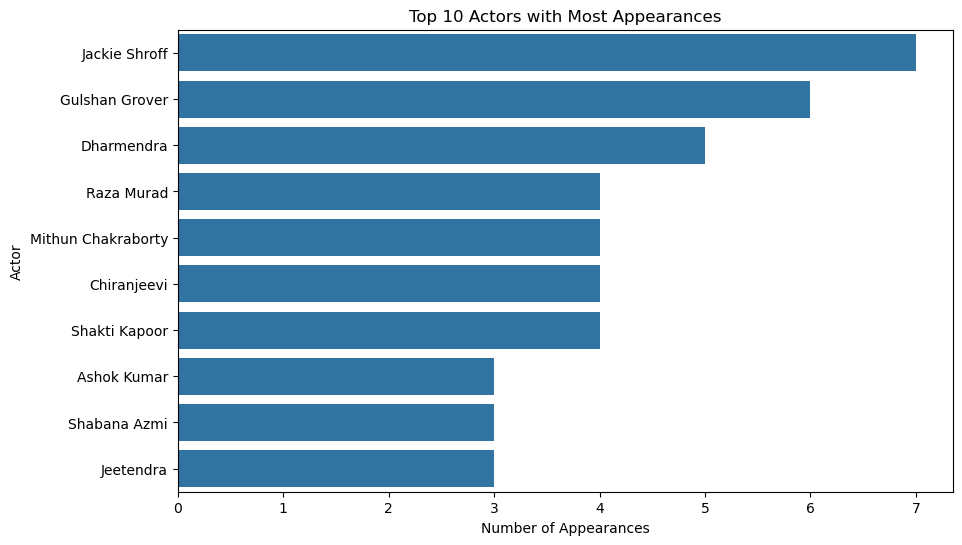

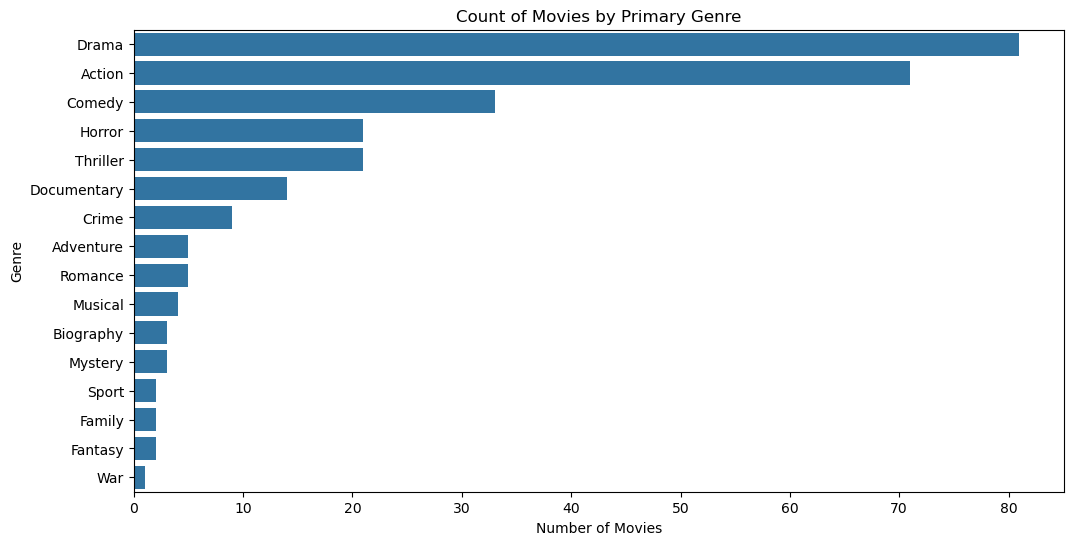

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('movie_dataset.xlsx')

print(df.head())

print(df.describe())

print("Count the number of movies in each genre ")

genre_counts = df['Genre'].value_counts()
print(genre_counts)

print("Calculate the average rating for each genre")

average_rating_by_genre = df.groupby('Genre')['Rating'].mean()
print(average_rating_by_genre)

print("Find the top 10 highest rated movies")

top_rated_movies = df.nlargest(10, 'Rating')
print(top_rated_movies[['Name', 'Rating']])

print("Count the number of movies released each year")

movies_per_year = df['Year'].value_counts().sort_index()
print(movies_per_year)

print("-------------------------------------------------")
# Load the dataset
file_path = 'movie_dataset.xlsx'
movie_data = pd.read_excel(file_path)

# Convert 'Duration' to numeric values (remove 'min' and convert to int)
movie_data['Duration'] = movie_data['Duration'].str.replace(' min', '').astype(float)

# Drop rows where 'Rating' or 'Year' is NaN
movie_data_cleaned = movie_data.dropna(subset=['Rating', 'Year'])

# Convert 'Year' to integer
movie_data_cleaned['Year'] = movie_data_cleaned['Year'].astype(int)

# Plot 1: Distribution of Movie Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movie_data_cleaned['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 2: Number of Movies Released Over Time
plt.figure(figsize=(10, 6))
sns.countplot(data=movie_data_cleaned, x='Year', order=sorted(movie_data_cleaned['Year'].unique()))
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Plot 3: Duration vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_data_cleaned, x='Duration', y='Rating')
plt.title('Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# 3. Movie Duration Distribution
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float)
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


# 5. Top 10 Directors by Movie Count
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

# 6. Top 10 Actors with Most Appearances
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top_actors = actors.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors with Most Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

# 2. Count of Movies by Genre (considering the first genre listed for each movie)

df['Primary Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else None)
plt.figure(figsize=(12, 6))
sns.countplot(y='Primary Genre', data=df, order=df['Primary Genre'].value_counts().index)
plt.title('Count of Movies by Primary Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()
